<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [25]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [26]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
df=pd.read_csv(house_csv)

In [27]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [28]:
# ANSWER
#Price is the target variable becasue it is the variable that affects the end user the most and does not have control of

#### 2.2 List all possible variables which might be Predictor variable.

In [29]:
# ANSWER
#beds, baths,sq_ft,type, and zip are all predictor variables
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [30]:
# ANSWER
df.corr(numeric_only=True)

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [31]:
# ANSWER-

df['y_mean']= df.price.mean()
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_mean
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


In [32]:
def draw_scatter_plot(x,y,y_mean):
    
    #create figure size
    fig= plt.figure(figsize=(15,7))
    
    ax= plt.gca()
    
    ax.scatter(x,y,marker='o',c='b')
    ax.plot(x,y_mean,c='r')
    
    plt.show()

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [33]:
# ANSWER
x=df['sq__ft']
y=df['price']
y_mean = df.y_mean

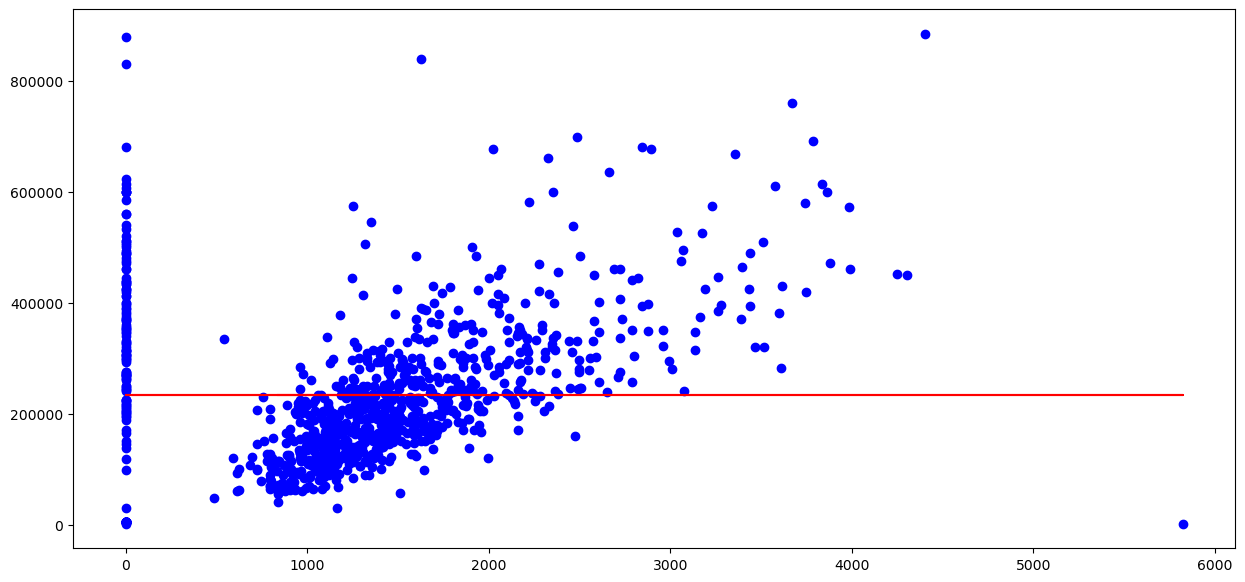

In [34]:
draw_scatter_plot(x,y,y_mean)

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [35]:
# ANSWER
X=df['sq__ft']
y=df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [36]:
# ANSWER
def calc_beta1(x,y):
    
    ybar=np.mean(y)
    xbar=np.mean(x)
    
    #n/d = numerator/denominator
    n=np.sum((y-ybar)*(x-xbar))
    d=np.sum((x-xbar)**2)
  
    return n/d

In [39]:
beta1=calc_beta1(X,y)
beta1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [40]:
# ANSWER
def calc_beta0(x,y):
    
    ybar=np.mean(y)
    xbar=np.mean(x)
    beta1= calc_beta1(x,y)
    
    return ybar-beta1*xbar

In [52]:
beta0=calc_beta0(X,y)
beta0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [41]:
# ANSWER
def find_yhat(x,y):
    beta0=calc_beta0(x,y)
    beta1=calc_beta1(x,y)
    
    return beta0 + (beta1*x)

In [42]:
y_hat=find_yhat(X,y)
y_hat

0      208206.784187
1      226133.293924
2      206040.438599
3      209073.322422
4      206094.597239
           ...      
980    286411.859897
981    242922.472227
982    228787.067268
983    254187.469282
984    236694.228663
Name: sq__ft, Length: 985, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [43]:
# ANSWER
def calc_residual(y,y_hat):
    res=y-y_hat
    return res

In [44]:
res = calc_residual(y,y_hat)
abs(res)

0      148984.784187
1      157921.293924
2      137160.438599
3      139766.322422
4      124194.597239
           ...      
980     53986.859897
981      8922.472227
982      6212.932732
983     18886.469282
984       956.228663
Length: 985, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [45]:
# ANSWER
def calc_total_sumsq(y):
    ybar=np.mean(y)
    sstot=np.sum((y-ybar)**2)
    return sstot

In [47]:
total_sumsq= calc_total_sumsq(y)
total_sumsq

18838783738865.37

In [48]:
def calc_res_sumsq(y,y_hat):
    ssres=np.sum((y-y_hat)**2)
    
    return ssres

In [49]:
res_sumsq=calc_res_sumsq(y,y_hat)
res_sumsq

16738500924917.504

In [50]:
def calc_r_sq(sstot,ssres):
    
    r_sq=1-(ssres/sstot)
    
    return r_sq

In [51]:
r_sq= calc_r_sq(total_sumsq,res_sumsq)
r_sq

0.11148717682951459

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [ ]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [53]:
# ANSWER
x_pred=1204
y_pred = beta0+beta1*x_pred
y_pred

228137.1635919888



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



